In [1]:
import gensim
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from util.dataset_util import *
from util.model_util import *
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
from keras.models import load_model

C:\Users\tianh\Desktop\environments\mlenv\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\tianh\Desktop\environments\mlenv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
embedding_model = read_embedding_model('model/GoogleNews-vectors-negative300.bin')

In [3]:
model = None
load_saved = True
if load_saved:
    model = load_model('model/saved_model.h5')
else:
    model = create_model()

C:\Users\tianh\Desktop\environments\mlenv\lib\site-packages\keras\models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [4]:
sgd = SGD(lr=5*1e-5, decay=1e-6, momentum=0.9)
model.get_layer(name='vgg16').trainable = False
model.compile(loss='mean_squared_error', optimizer=sgd)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               153900    
Total params: 18,542,188
Trainable params: 3,827,500
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
loss_history = []

In [ ]:
for i in range(500):
    print('iteration ', str(i+1))
    imgs_cifar10, labels_cifar10 = read_cifar_batch('data/cifar10','data_batch_'+str(i%5+1),'batches.meta',embedding_model,(224,224),100)
    imgs_cifar100, labels_cifar100 = read_cifar_batch('data/cifar100','train','meta',embedding_model,(224, 224),100)
    imgs_caltech101, labels_caltech101 = read_caltech('data/caltech101', 5, (224, 224), embedding_model)
    imgs_caltech256, labels_caltech256 = read_caltech('data/caltech256', 5, (224, 224), embedding_model)
    imgs_custom, labels_custom = read_caltech('data/custom', 5, (224, 224), embedding_model)
    imgs = np.vstack((imgs_cifar10, imgs_cifar100, imgs_caltech101, imgs_caltech256, imgs_custom))
    labels = np.vstack((labels_cifar10, labels_cifar100, labels_caltech101, labels_caltech256, labels_custom))
    loss = model.fit(x=imgs, y=labels, epochs=10, verbose=1, shuffle=True)
    loss_history.extend(loss.history['loss'])
    if i%10 == 0:
        model.save('model/saved_model.h5')

iteration  1
Epoch 1/10
1603/1603 [==============================] - 17s 11ms/step - loss: 0.0258
Epoch 2/10
1603/1603 [==============================] - 17s 10ms/step - loss: 0.0254
Epoch 3/10
1603/1603 [==============================] - 17s 10ms/step - loss: 0.0251
Epoch 4/10
1603/1603 [==============================] - 17s 10ms/step - loss: 0.0248
Epoch 5/10
1603/1603 [==============================] - 17s 10ms/step - loss: 0.0246
Epoch 6/10
1603/1603 [==============================] - 17s 10ms/step - loss: 0.0244
Epoch 7/10
1603/1603 [==============================] - 17s 10ms/step - loss: 0.0242
Epoch 8/10
1603/1603 [==============================] - 17s 10ms/step - loss: 0.0241
Epoch 9/10
1603/1603 [==============================] - 17s 10ms/step - loss: 0.0239
Epoch 10/10
 224/1603 [===>..........................] - ETA: 14s - loss: 0.0246

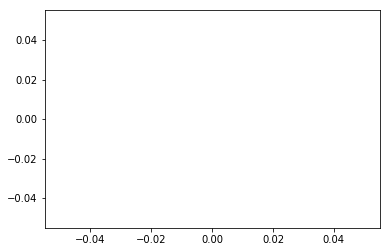

In [21]:
plt.figure()
plt.plot(loss_history)
plt.show()

In [15]:
imgs_test, labels_test = read_caltech('data/test', 5, (224, 224), embedding_model)
model.evaluate(x=imgs_test, y=labels_test, verbose=1)

18/18 [==============================] - 0s 10ms/step


0.022115372121334076

In [17]:
predict('data/sample/bike1.jpg', model, embedding_model)

1/1 [==============================] - 0s 217ms/step
[ 0.00691646 -0.0688502  -0.04001001  0.17705329 -0.09200305 -0.09946471
 -0.03058709 -0.0168856   0.18320896 -0.00667398  0.12555768 -0.266822
 -0.07632462 -0.06964496 -0.11636984  0.15773928 -0.07438608  0.10266893
 -0.02859509 -0.04312747  0.08348525  0.08167507  0.0780967   0.01756329
  0.04581498  0.0080864  -0.14269792  0.17742977  0.00998209  0.0128263
 -0.1913908  -0.07347117 -0.06899538  0.04335061  0.02660489 -0.0536364
 -0.04088779  0.05936055  0.01410387 -0.06612661 -0.02534005 -0.07688256
  0.18176343  0.09397325  0.03787327 -0.09799411 -0.02327575 -0.00573934
  0.10921634 -0.04526187 -0.20605434  0.07867944  0.17595153 -0.12866567
  0.03160847 -0.07177016  0.05633695 -0.09144722  0.08161859 -0.04082317
  0.01999977 -0.06590128 -0.07611112  0.00879839  0.11309446  0.05954796
 -0.03907567  0.02545435 -0.06014112  0.11266386  0.07008443 -0.0472017
  0.00478592 -0.14673606 -0.18698935  0.00756519 -0.02679269 -0.06268622
  0

[('airplanes', 0.5660192966461182),
 ('airplane', 0.5586729049682617),
 ('cashier_Ashley_Woloszyn', 0.5276556015014648),
 ('bare_knuckled_zingers', 0.504732608795166),
 ('Lego_creations', 0.4994543790817261),
 ('Moller_Skycar', 0.4915383458137512),
 ('gunny_sack', 0.491530179977417),
 ('whoosh_whoosh', 0.48970794677734375),
 ('motorized_gliders', 0.4896121919155121),
 ('batmobile', 0.48923659324645996)]

In [11]:
model.save('model/saved_model.h5')